# <span style="color:blue"> INDR 422/522 - LAB NO. 1</span>
## <span style="color:GREEN">ESTIMATION METHODS</span>

### <span style="color:RED">MAIN TOPICS</span>
#### <span style="padding-left: 30px;color:GRAY">1. Naive Estimation</span>
#### <span style="padding-left: 30px;color:GRAY">2. Moving Average Estimation</span>
#### <span style="padding-left: 30px;color:GRAY">3. Short Term Trend Estimation</span>
#### <span style="padding-left: 30px;color:GRAY">4. Seasonal Estimation</span>
#### <span style="padding-left: 30px;color:GRAY">5. Exponential Smooth Estimation</span>

### <span style="color:RED">INSTALLING REQUIRED TOOLS</span>

In [1]:
# First, you need to install the packages once on your PC. Open a new cell, add following codes (commented ones) -
# and run it, then import following tools:
# pip install matplotlib
# pip install bbplot
# pip install pandas
# pip install numpy

import matplotlib.pyplot as plt
from bbplot import bijan
import pandas as pd
import numpy as np

### <span style="color:RED">Error Formulas</span>

# <span style="color:GRAY">
$
\begin{aligned}
MAE  &= \frac{1}{n} \sum_{n} |Actual-Estimate| && \text{*** Mean Absolute Error}\\    
MAPE &= \frac{1}{n} \sum_{n} |\frac{Actual-Estimate}{Actual}| && \text{*** Mean Absolute Percentage Error}\\
MSE &= \frac{1}{n} \sum_{n} (Actual-Estimate)^2 && \text{*** Mean Squared Error}\\
RMSE &= \sqrt{MSE} && \text{*** Root Mean Square Error}\\
\end{aligned}
$</span>

### <span style="color:RED">IMPORTING DATASET AND PLOTTING</span>

In [2]:
data = pd.read_csv("Dishwasher_L01.csv", header=None)
data.columns=['Month', 'Sales']
data

,Month,Sales
0,1,26724.0
1,2,25761.0
2,3,26983.0
3,4,26993.0
4,5,27072.0
...,...,...
115,116,30505.0
116,117,30909.0
117,118,28469.0
118,119,25997.0


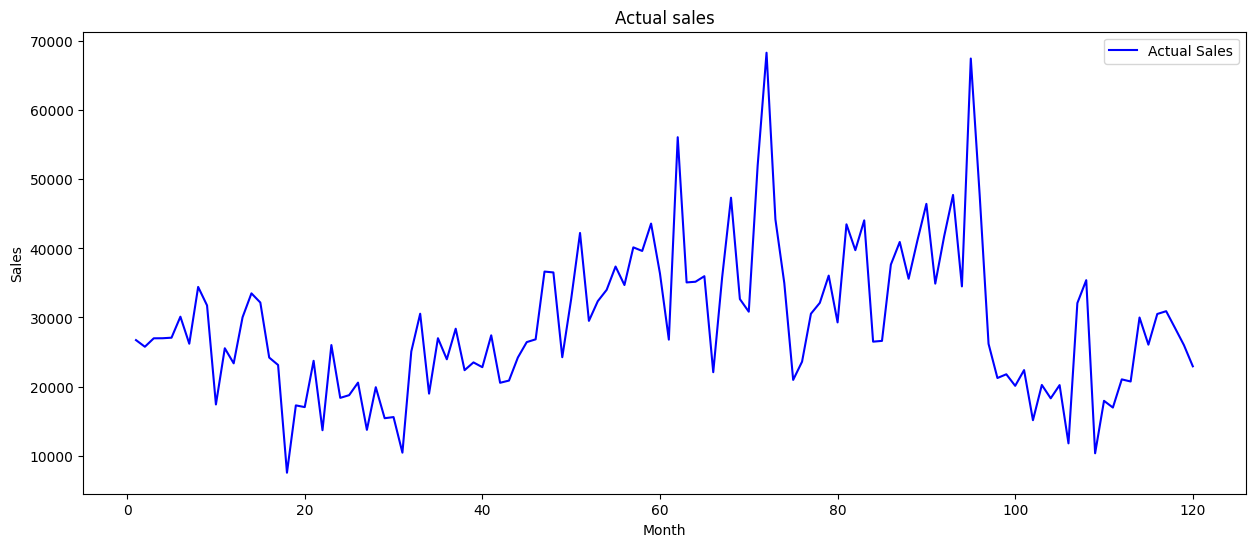

In [3]:
actual_sales = data['Sales']
month = data['Month']
no_months = len(actual_sales)

plt.figure(figsize = (15, 6))
plt.plot(month,actual_sales, 'b')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Actual sales")
plt.legend(['Actual Sales'])
plt.show()

### <span style="color:RED">ESTIMATOR 1: NAIVE (Sales of Current month = Sales of previous month)</span>
#### $\hat{y}[n] = {y}[n-1]$

In [4]:
# shift actual sales one month as estimated sales for next month
data['y_n-1'] = actual_sales.shift(+1)
data

,Month,Sales,y_n-1
0,1,26724.0,NaN
1,2,25761.0,26724.0
2,3,26983.0,25761.0
3,4,26993.0,26983.0
4,5,27072.0,26993.0
...,...,...,...
115,116,30505.0,26063.0
116,117,30909.0,30505.0
117,118,28469.0,30909.0
118,119,25997.0,28469.0


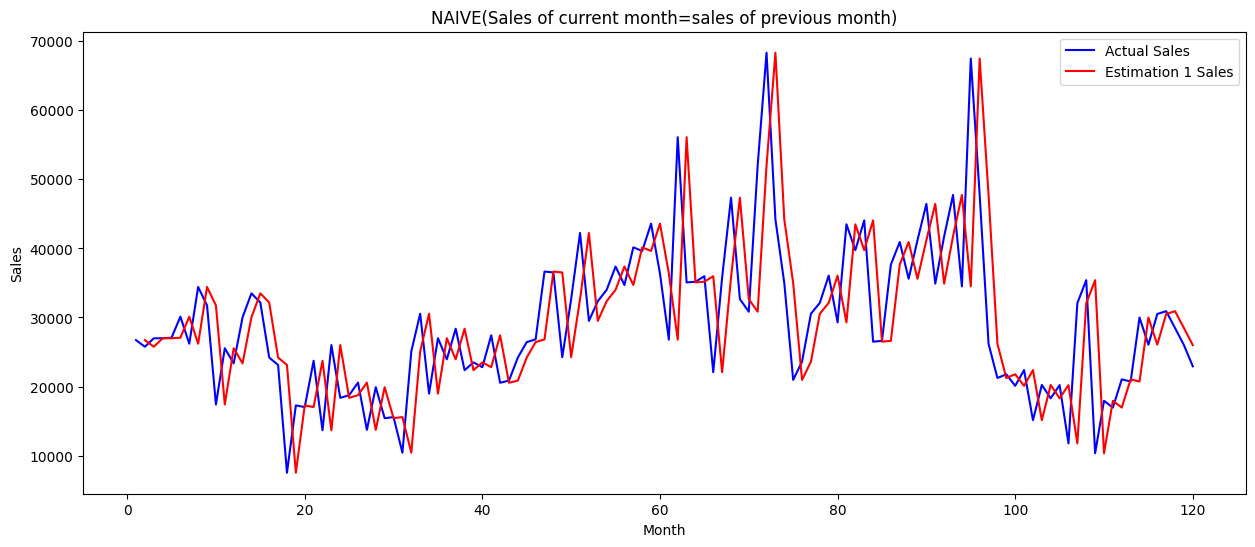

MAE1  =  7002.49
MAPE1 =  26.95%
MSE1  =  92464126.68
RMSE1 =  9615.83


In [5]:
# Define Actual Sales and Estimated Sales for estimation range >>> month[1:]

Actual_Sales_r = data['Sales'][1:no_months]
Estimate_Sales_r = data['y_n-1'][1:no_months]
Month_r = month[1:]

# Error calculation

Error1 = Actual_Sales_r - Estimate_Sales_r
mae1=np.mean(np.abs(Error1))
mape1=np.mean(np.abs(Error1)/Actual_Sales_r)*100
mse1=np.mean(Error1**2)
rmse1=np.sqrt(mse1)

plt.figure(figsize = (15, 6))
plt.plot(month,actual_sales, 'b')
plt.plot(Month_r,Estimate_Sales_r, 'r')

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("NAIVE(Sales of current month=sales of previous month)")
plt.legend(['Actual Sales','Estimation 1 Sales'])
plt.show()

print('MAE1  = ', "%.2f" % mae1)
print('MAPE1 = ', "{0:.2f}%".format(mape1))
print('MSE1  = ', "%.2f" % mse1)
print('RMSE1 = ', "%.2f" % rmse1)

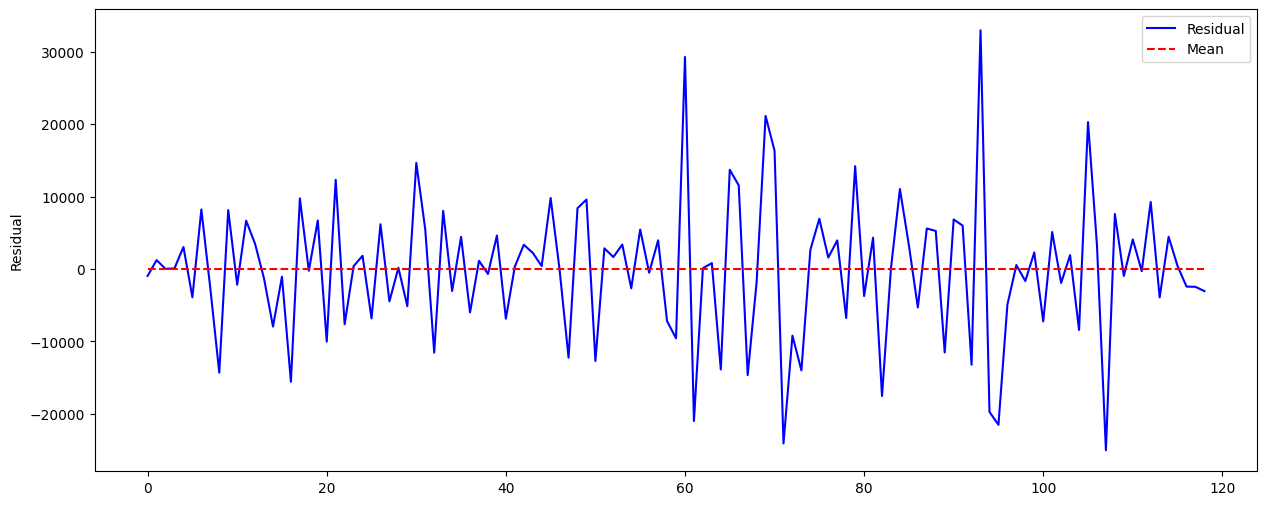

Mean of Residual:    -31.88235294117641
S.D. of Residual:    9656.432875459397
Half Width :         1752.944421759218   (degree of freedom = 118, Confidence Level = 0.95)
p-value :            0.9713


In [6]:
# Residual Plot (Actual observation - Estimation)

bijan.resid(Error1)

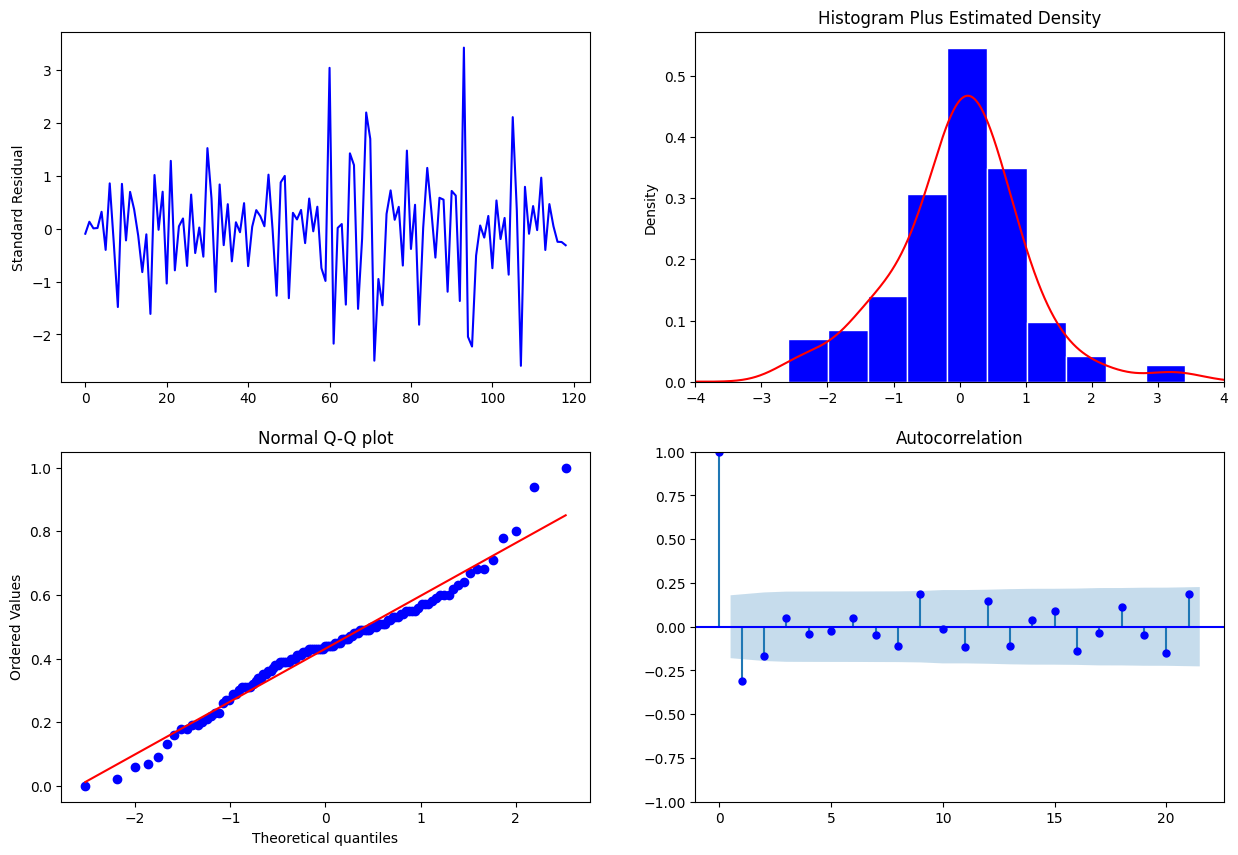

In [7]:
# Diagnostic errors for residusal (Actual - Estimation)

bijan.eplot(Error1)

### <span style="color:RED">ESTIMATOR 2: MOVING AVERAGE</span>
#### $\hat{y}[n] = \dfrac{y[n-1]+y[n-2]+y[n-3]}{3}$

In [8]:
# shift actual sales one/two/three month/s as estimated sales for following months
data['y_n-1'] = actual_sales.shift(+1)
data['y_n-2'] = actual_sales.shift(+2)
data['y_n-3'] = actual_sales.shift(+3)
data

,Month,Sales,y_n-1,y_n-2,y_n-3
0,1,26724.0,NaN,NaN,NaN
1,2,25761.0,26724.0,NaN,NaN
2,3,26983.0,25761.0,26724.0,NaN
3,4,26993.0,26983.0,25761.0,26724.0
4,5,27072.0,26993.0,26983.0,25761.0
...,...,...,...,...,...
115,116,30505.0,26063.0,29994.0,20731.0
116,117,30909.0,30505.0,26063.0,29994.0
117,118,28469.0,30909.0,30505.0,26063.0
118,119,25997.0,28469.0,30909.0,30505.0


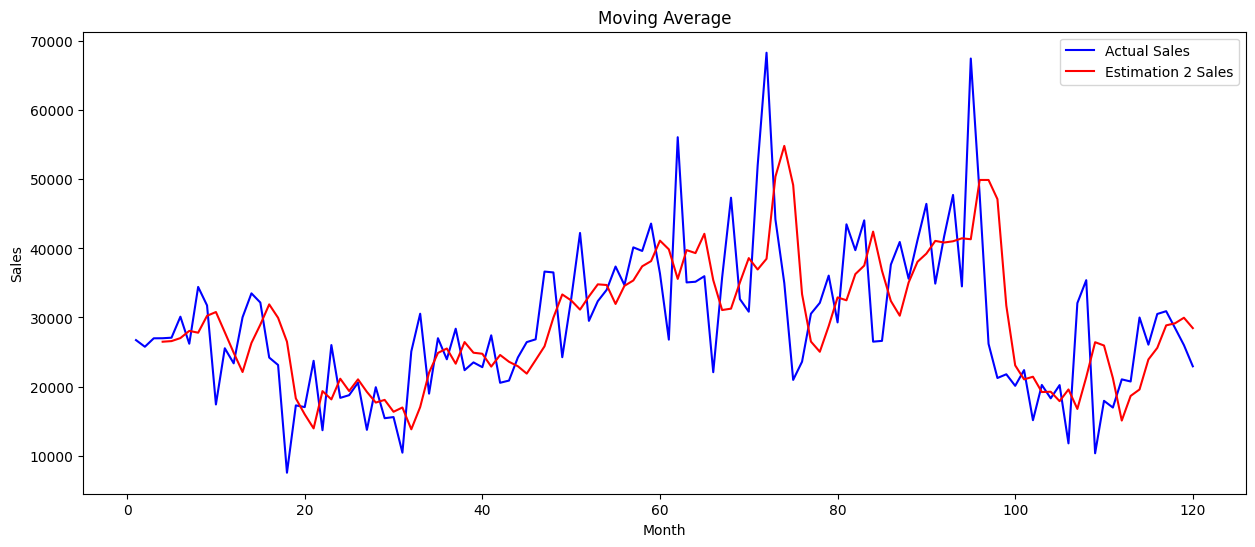

MAE2  =  6715.89
MAPE2 =  26.20%
MSE2  =  84111407.60
RMSE2 =  9171.23


In [9]:
# Define Actual Sales and Estimated Sales for estimation range >>> month[3:]

Actual_Sales_r2 = data['Sales'][3:no_months]
Estimate_Sales_r2 = (data['y_n-1'][3:no_months]+data['y_n-2'][3:no_months]+data['y_n-3'][3:no_months])/3
Month_r2 = month[3:]

# Error calculation

Error2 = Actual_Sales_r2 - Estimate_Sales_r2
mae2=np.mean(np.abs(Error2))
mape2=np.mean(np.abs(Error2)/Actual_Sales_r2)*100
mse2=np.mean(Error2**2)
rmse2=np.sqrt(mse2)

plt.figure(figsize = (15, 6))
plt.plot(month,actual_sales, 'b')
plt.plot(Month_r2,Estimate_Sales_r2, 'r')

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Moving Average")
plt.legend(['Actual Sales','Estimation 2 Sales'])
plt.show()

print('MAE2  = ', "%.2f" % mae2)
print('MAPE2 = ', "{0:.2f}%".format(mape2))
print('MSE2  = ', "%.2f" % mse2)
print('RMSE2 = ', "%.2f" % rmse2)

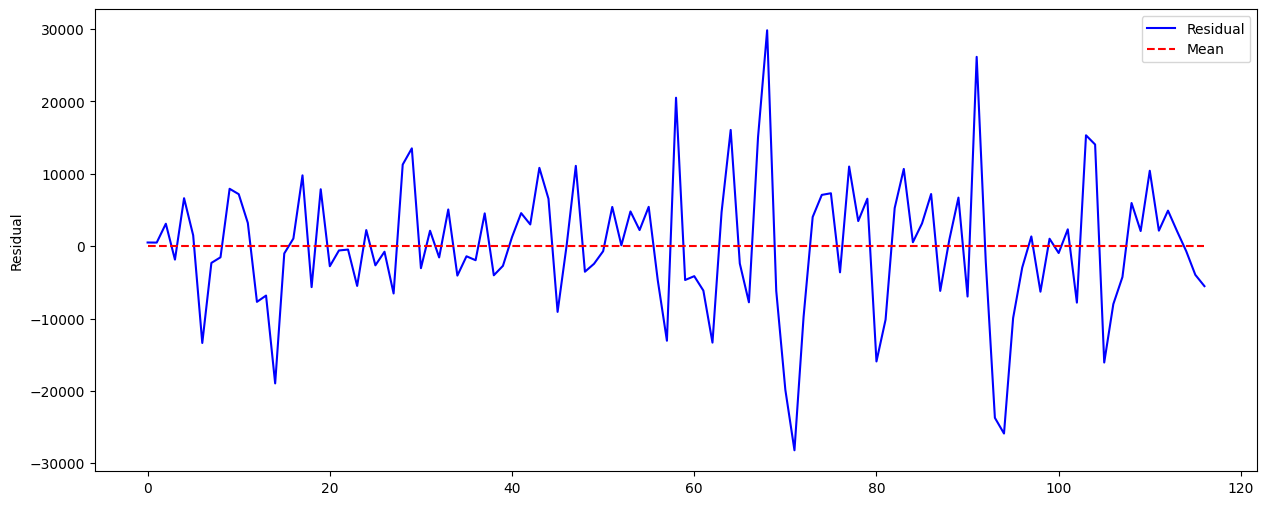

Mean of Residual:    -28.324786324786295
S.D. of Residual:    9210.62955143691
Half Width :         1686.54860191226   (degree of freedom = 116, Confidence Level = 0.95)
p-value :            0.9735


In [10]:
# Residual Plot (Actual observation - Estimation)

bijan.resid(Error2)

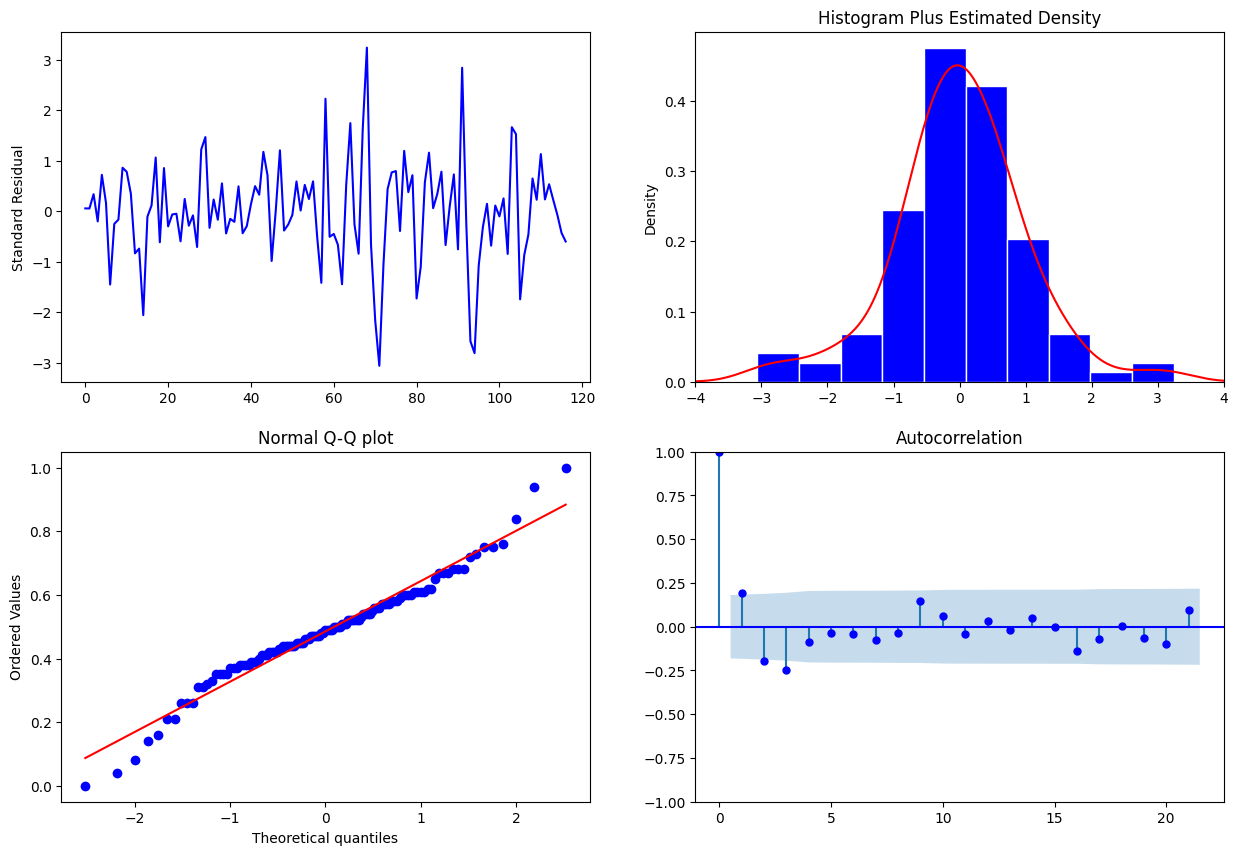

In [11]:
# Diagnostic errors for residusal (Actual - Estimation)

bijan.eplot(Error2)

### <span style="color:RED">ESTIMATOR 3: SHORT TERM TREND FORECAST</span>
#### $\hat{y}[n] = {y[n-1]+y[n-2]-y[n-3]}$

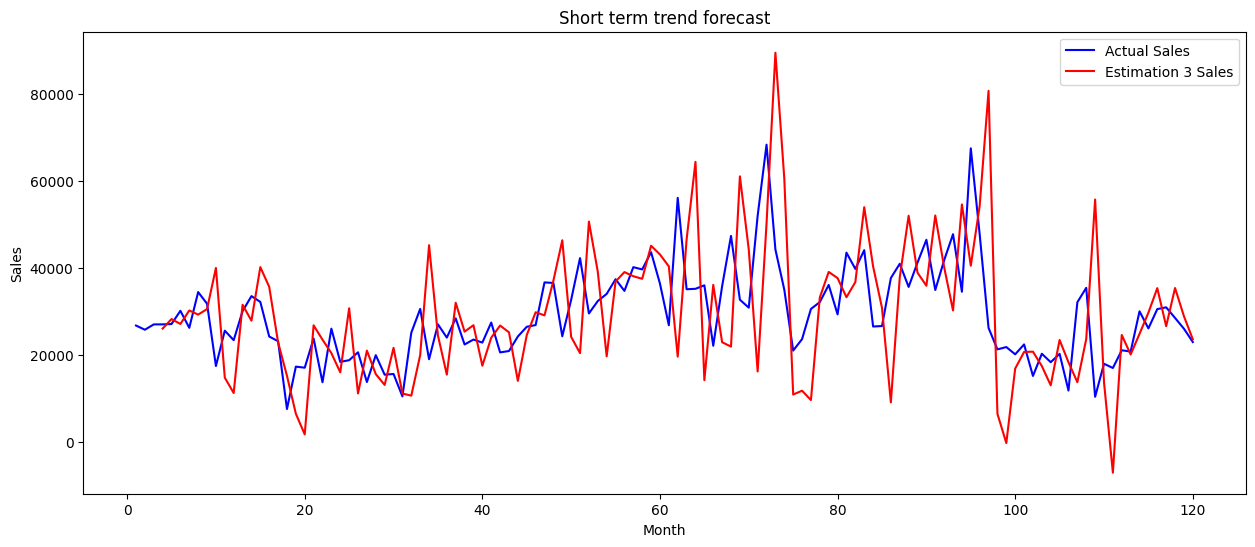

MAE3  =  10653.37
MAPE3 =  40.41%
MSE3  =  219873900.77
RMSE3 =  14828.15


In [12]:
Actual_Sales_r3 = data['Sales'][3:no_months]
Estimate_Sales_r3 = data['y_n-1'][3:no_months]+data['y_n-2'][3:no_months]-data['y_n-3'][3:no_months]
Month_r3 = month[3:]

# Error calculation

Error3 = Actual_Sales_r3 - Estimate_Sales_r3
mae3=np.mean(np.abs(Error3))
mape3=np.mean(np.abs(Error3)/Actual_Sales_r3)*100
mse3=np.mean(Error3**2)
rmse3=np.sqrt(mse3)

plt.figure(figsize = (15, 6))
plt.plot(month,actual_sales, 'b')
plt.plot(Month_r3,Estimate_Sales_r3, 'r')

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Short term trend forecast")
plt.legend(['Actual Sales','Estimation 3 Sales'])
plt.show()

print('MAE3  = ', "%.2f" % mae3)
print('MAPE3 = ', "{0:.2f}%".format(mape3))
print('MSE3  = ', "%.2f" % mse3)
print('RMSE3 = ', "%.2f" % rmse3)

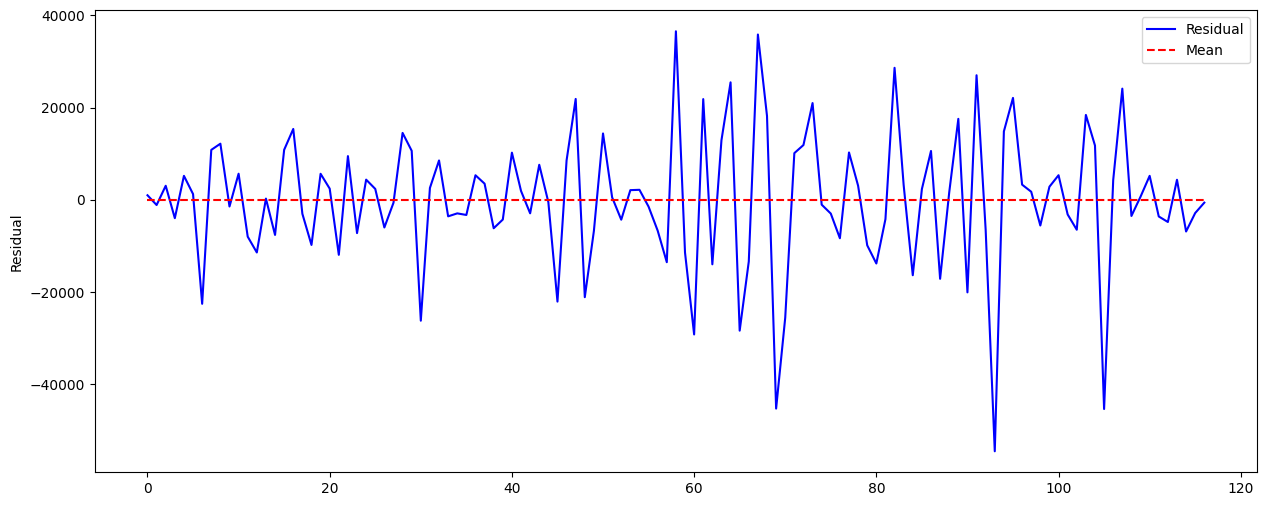

Mean of Residual:    -49.55555555555531
S.D. of Residual:    14891.839661608243
Half Width :         2726.828955711145   (degree of freedom = 116, Confidence Level = 0.95)
p-value :            0.9713


In [13]:
# Residual Plot (Actual observation - Estimation)

bijan.resid(Error3)

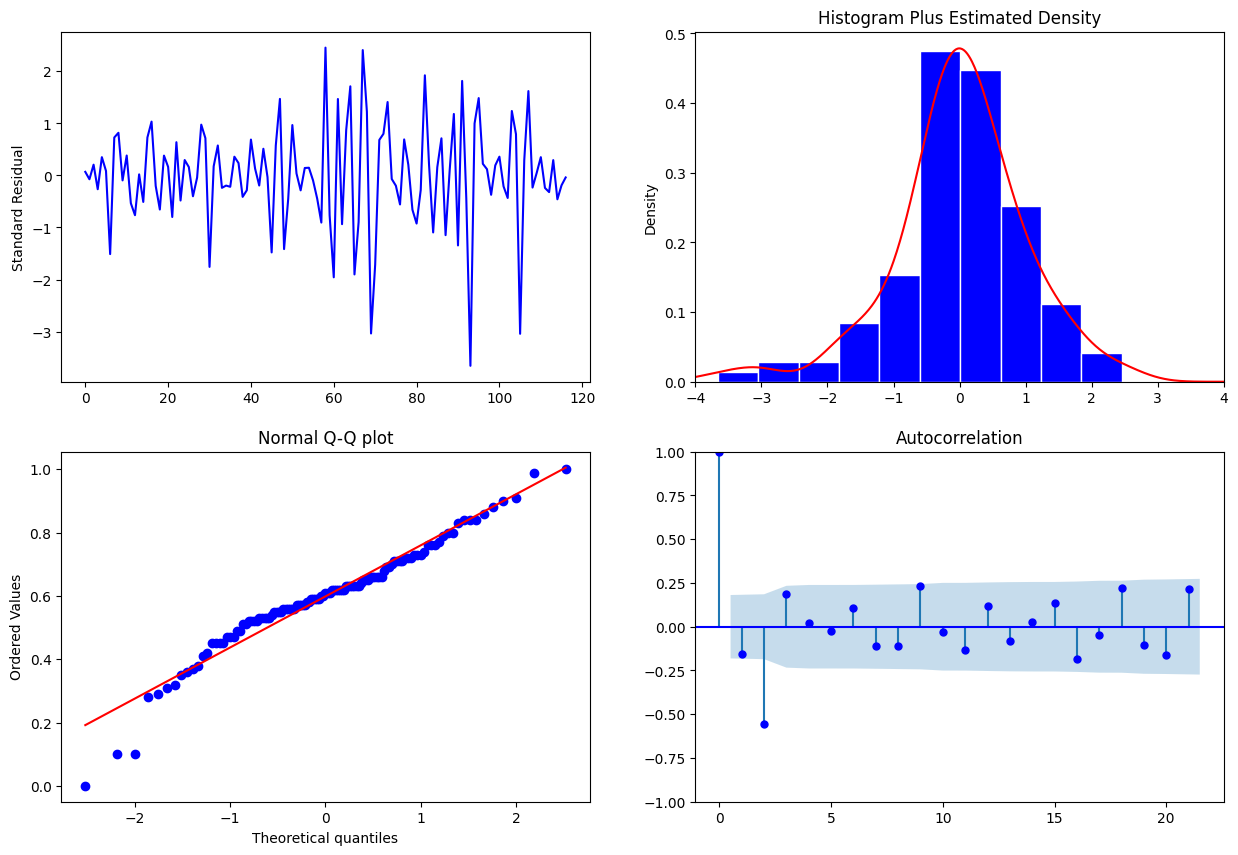

In [14]:
# Diagnostic errors for residusal (Actual - Estimation)

bijan.eplot(Error3)

### <span style="color:RED">ESTIMATOR 4: SEASONAL FORECAST</span>
#### $\hat{y}[n] = {y[n-12]}$

In [15]:
# shift actual sales 12 months as estimated sales for 12 months

data['y_n-12'] = actual_sales.shift(+12)
data

,Month,Sales,y_n-1,y_n-2,y_n-3,y_n-12
0,1,26724.0,NaN,NaN,NaN,NaN
1,2,25761.0,26724.0,NaN,NaN,NaN
2,3,26983.0,25761.0,26724.0,NaN,NaN
3,4,26993.0,26983.0,25761.0,26724.0,NaN
4,5,27072.0,26993.0,26983.0,25761.0,NaN
...,...,...,...,...,...,...
115,116,30505.0,26063.0,29994.0,20731.0,18296.0
116,117,30909.0,30505.0,26063.0,29994.0,20209.0
117,118,28469.0,30909.0,30505.0,26063.0,11774.0
118,119,25997.0,28469.0,30909.0,30505.0,32080.0


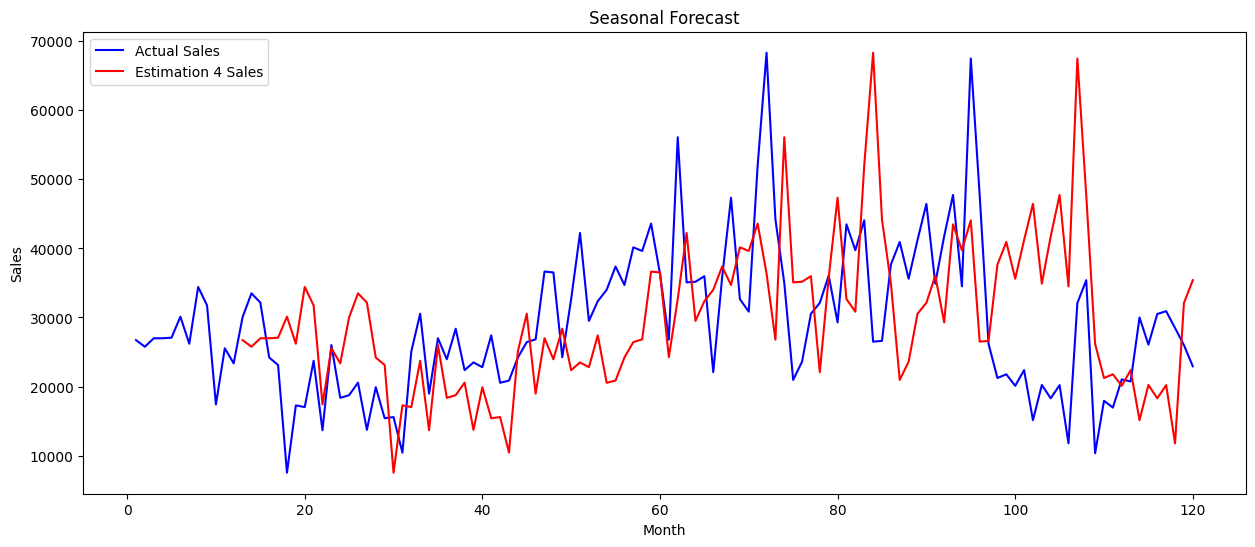

MAE4  =  10848.66
MAPE4 =  43.82%
MSE4  =  180296748.29
RMSE4 =  13427.46


In [16]:
Actual_Sales_r4 = data['Sales'][12:no_months]
Estimate_Sales_r4 = data['y_n-12'][12:no_months]
Month_r4 = month[12:]

# Error calculation

Error4 = Actual_Sales_r4 - Estimate_Sales_r4
mae4=np.mean(np.abs(Error4))
mape4=np.mean(np.abs(Error4)/Actual_Sales_r4)*100
mse4=np.mean(Error4**2)
rmse4=np.sqrt(mse4)

plt.figure(figsize = (15, 6))
plt.plot(month,actual_sales, 'b')
plt.plot(Month_r4,Estimate_Sales_r4, 'r')

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Seasonal Forecast")
plt.legend(['Actual Sales','Estimation 4 Sales'])
plt.show()

print('MAE4  = ', "%.2f" % mae4)
print('MAPE4 = ', "{0:.2f}%".format(mape4))
print('MSE4  = ', "%.2f" % mse4)
print('RMSE4 = ', "%.2f" % rmse4)

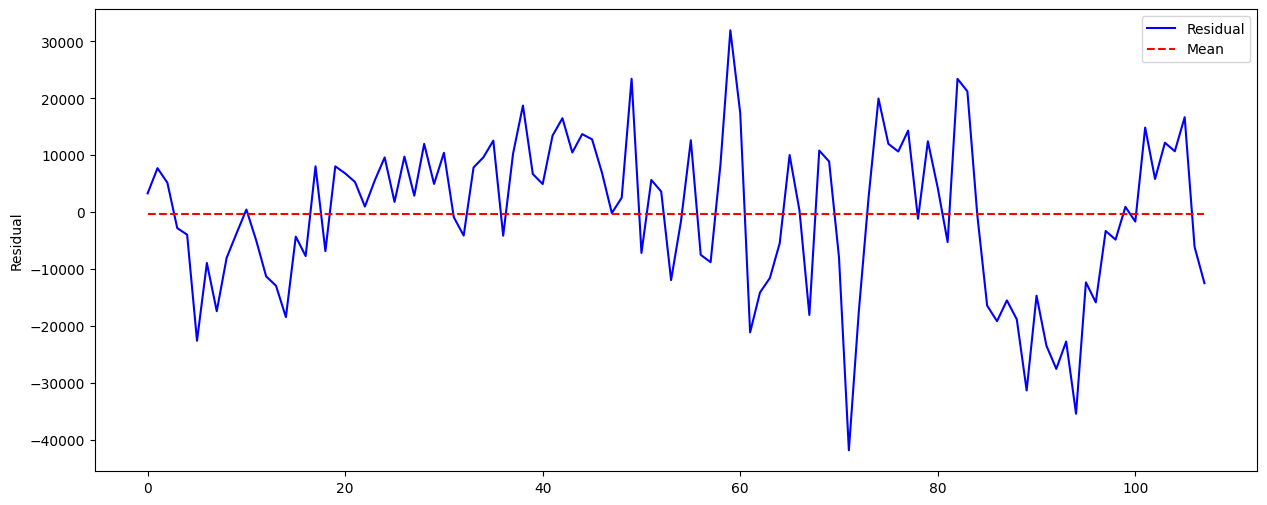

Mean of Residual:    -374.56481481481484
S.D. of Residual:    13484.81199809538
Half Width :         2572.2943516286527   (degree of freedom = 107, Confidence Level = 0.95)
p-value :            0.7734


In [17]:
# Residual Plot (Actual observation - Estimation)

bijan.resid(Error4.reset_index(drop=True))

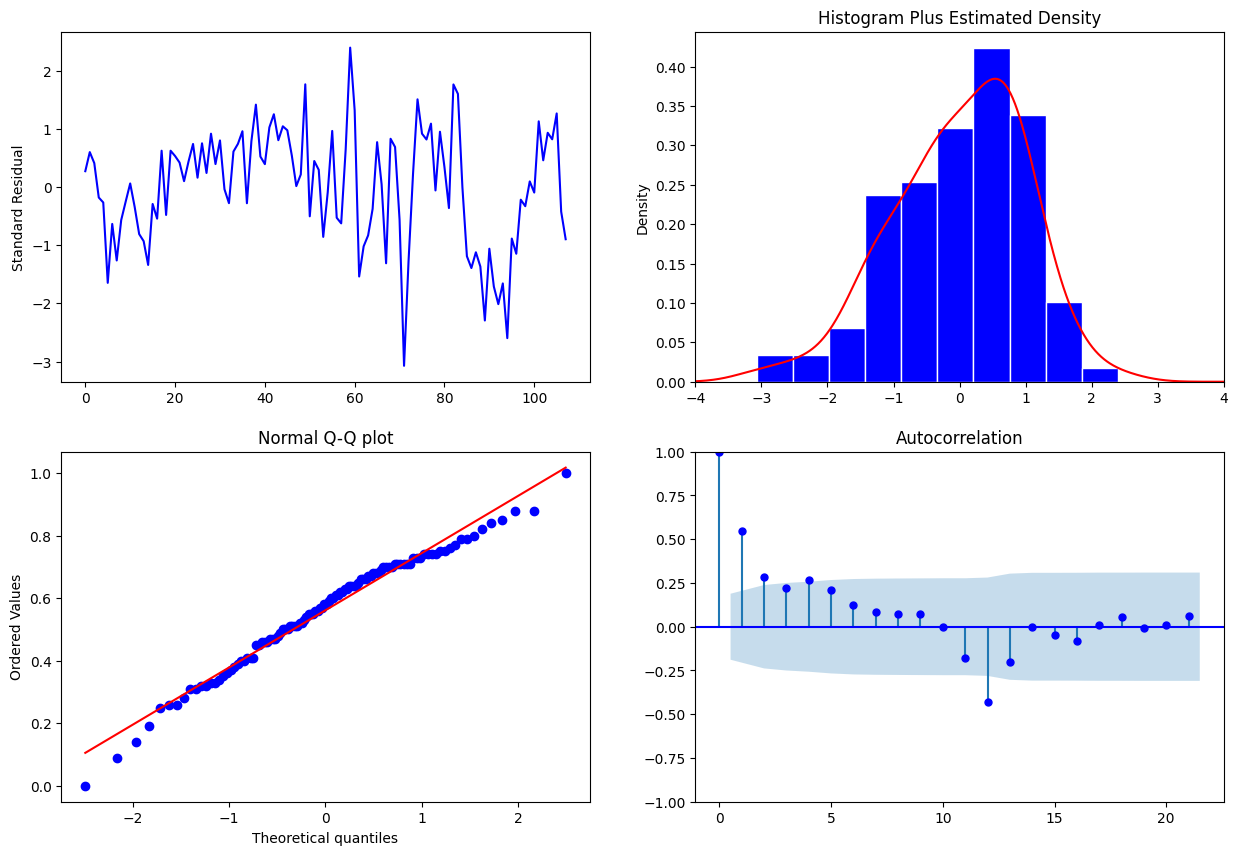

In [18]:
# Diagnostic errors for residusal (Actual - Estimation)

bijan.eplot(Error4)

### <span style="color:RED">ESTIMATOR 5: EXPONENTIAL SMOOTHING</span>
#### $\hat{y}[n] = {\alpha*y[n-1]+(1-\alpha)*\hat{y}[n-1]}$

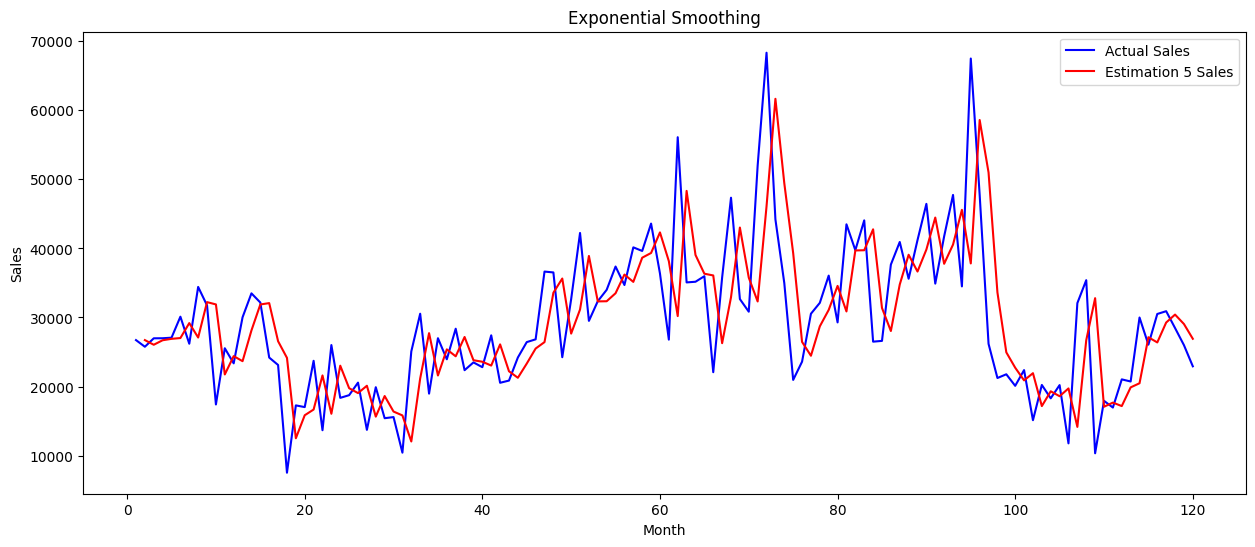

MAE5  =  6575.95
MAPE5 =  25.29%
MSE5  =  79934590.74
RMSE5 =  8940.61


In [19]:
# assumed that alpha is 0.7

alpha=0.7

Actual_Sales_r5 = data['Sales'][1:no_months]
Estimate_Sales_r5=np.zeros(no_months)
Estimate_Sales_r5[0]=actual_sales[0]
for k in range(1,no_months):
    Estimate_Sales_r5[k]=alpha*actual_sales[k-1]+(1-alpha)*Estimate_Sales_r5[k-1]

Month_r5 = month[1:]

Error5 = Actual_Sales_r5 - Estimate_Sales_r5[1:]
mae5=np.mean(np.abs(Error5))
mape5=np.mean(np.abs(Error5)/Actual_Sales_r5)*100
mse5=np.mean(Error5**2)
rmse5=np.sqrt(mse5)

plt.figure(figsize = (15, 6))
plt.plot(month,actual_sales, 'b')
plt.plot(Month_r5,Estimate_Sales_r5[1:], 'r')

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Exponential Smoothing")
plt.legend(['Actual Sales','Estimation 5 Sales'])
plt.show()

print('MAE5  = ', "%.2f" % mae5)
print('MAPE5 = ', "{0:.2f}%".format(mape5))
print('MSE5  = ', "%.2f" % mse5)
print('RMSE5 = ', "%.2f" % rmse5)

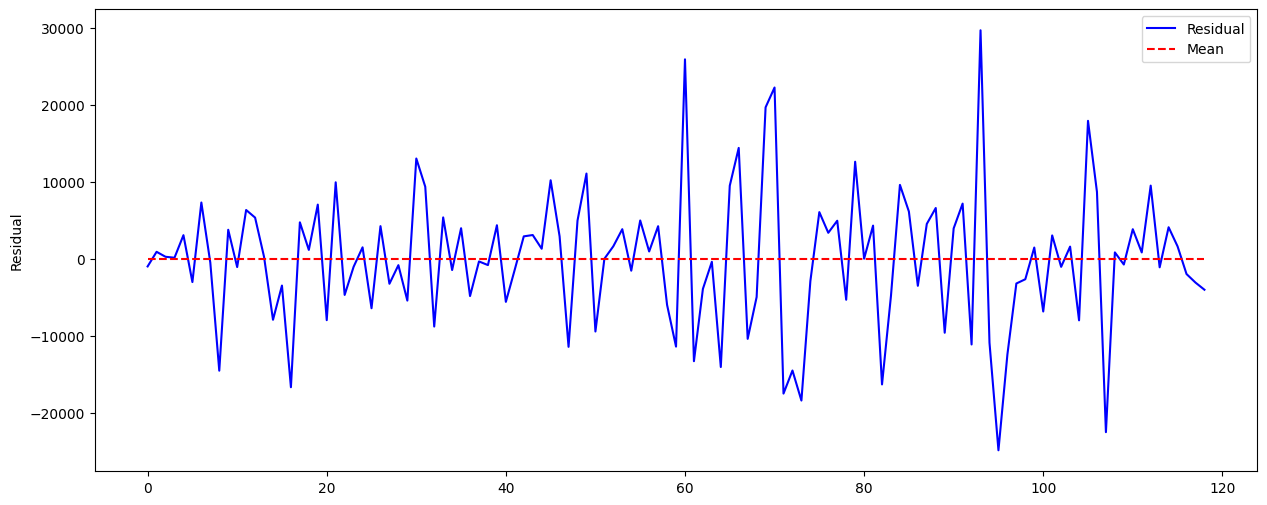

Mean of Residual:    -31.198349330022097
S.D. of Residual:    8978.364045817596
Half Width :         1629.853733114748   (degree of freedom = 118, Confidence Level = 0.95)
p-value :            0.9698


In [20]:
# Residual Plot (Actual observation - Estimation)

bijan.resid(Error5)

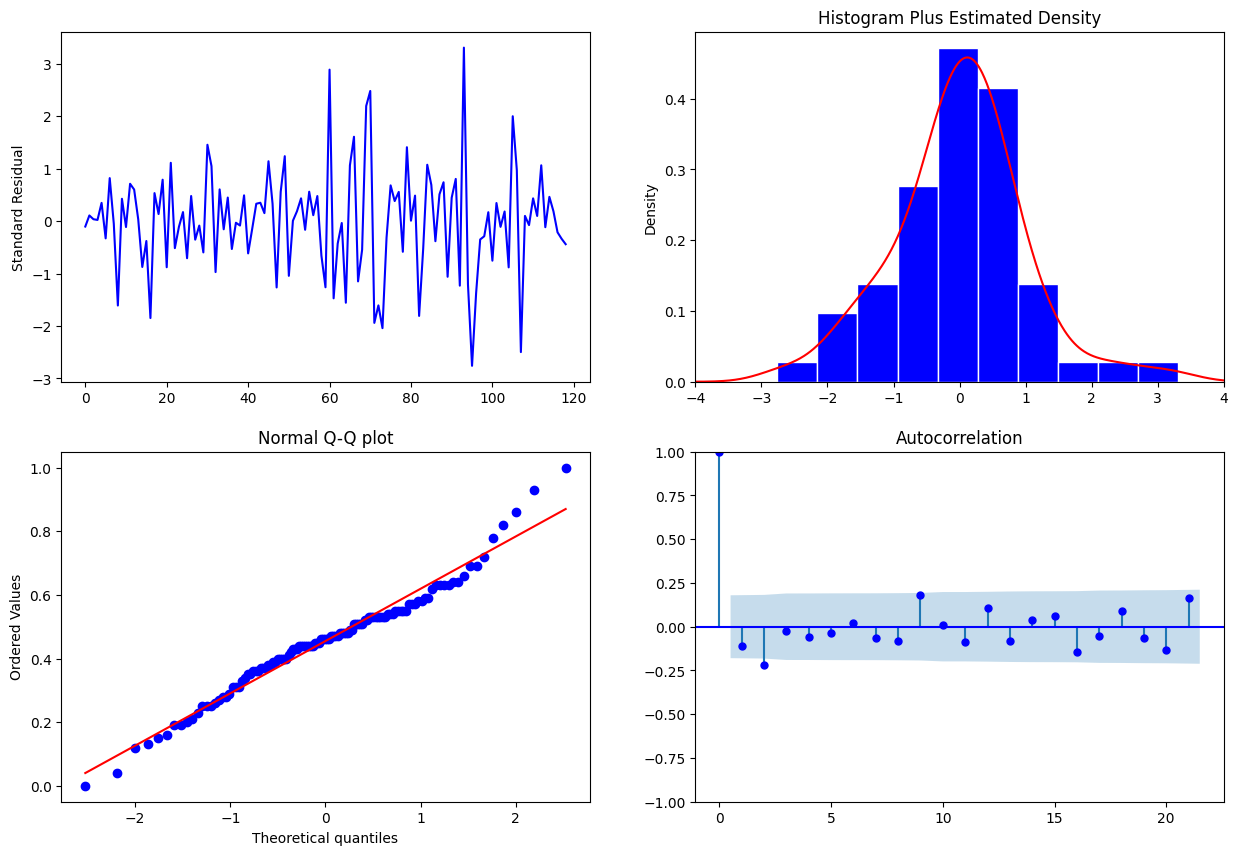

In [21]:
# Diagnostic errors for residusal (Actual - Estimation)

bijan.eplot(Error5)

### <span style="color:RED">SUMMARY OF RESULTS</span>
#### <span style="color:BLACK">Comparing the suggested estimators in terms of error rates</span>

In [22]:
est = ['Naive', 'Moving Average', 'Short Term Trend', 'Seasonal', 'Exponential']


MAE_tot = []
MAPE_tot = []
MSE_tot = []
RMSE_tot = []

No_of_Estimator = 5

for i in range(1, No_of_Estimator+1):
    MAE_tot.append(globals()['{}{}'.format('mae', i)])
    MAPE_tot.append(globals()['{}{}'.format('mape', i)])
    MSE_tot.append(globals()['{}{}'.format('mse', i)])
    RMSE_tot.append(globals()['{}{}'.format('rmse', i)])
    
results = {
    'MAE': MAE_tot,
    'MAPE (%)': MAPE_tot,
    'MSE': MSE_tot,
    'RMSE': RMSE_tot
}

pd.options.display.float_format = '{:,.2f}'.format

df_results = pd.DataFrame(results, index=est)
df_results

,MAE,MAPE (%),MSE,RMSE
Naive,"7,002.49",26.95,"92,464,126.68","9,615.83"
Moving Average,"6,715.89",26.20,"84,111,407.60","9,171.23"
Short Term Trend,"10,653.37",40.41,"219,873,900.77","14,828.15"
Seasonal,"10,848.66",43.82,"180,296,748.29","13,427.46"
Exponential,"6,575.95",25.29,"79,934,590.74","8,940.61"
